<a href="https://colab.research.google.com/github/hpatryck/Processamento-Digital-de-Imagem/blob/main/Atividade_3_Remo%C3%A7%C3%A3o_de_%C3%A1rea_de_contorno_e_fun%C3%A7%C3%A3o_de_clone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
print("OpenCV-Python Version {}".format(cv2.__version__))

from google.colab import drive
drive.mount('/content/drive')

OpenCV-Python Version 4.10.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


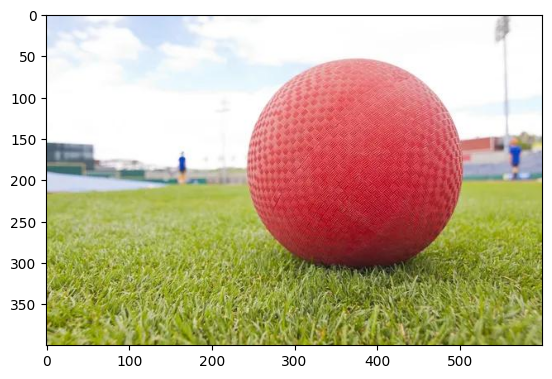

In [ ]:
image = io.imread(r'/content/drive/MyDrive/Colab Notebooks/red_ball.jpg')

io.imsave('red_ball.jpg', image)

# loading the image from the disk
image = cv2.imread('red_ball.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

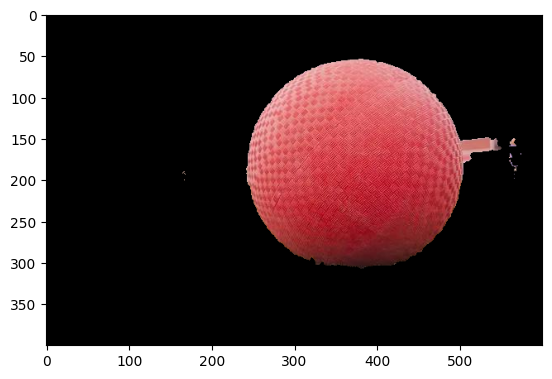

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

upper_mask = cv2.inRange(hsv, (160, 50, 40), (170, 255, 255))
lower_mask = cv2.inRange(hsv, (110, 50, 30), (170, 255, 255))

mask = cv2.bitwise_or(upper_mask, lower_mask)

result = cv2.bitwise_and(image, image, mask=mask)

plt.imshow(result)
plt.show()


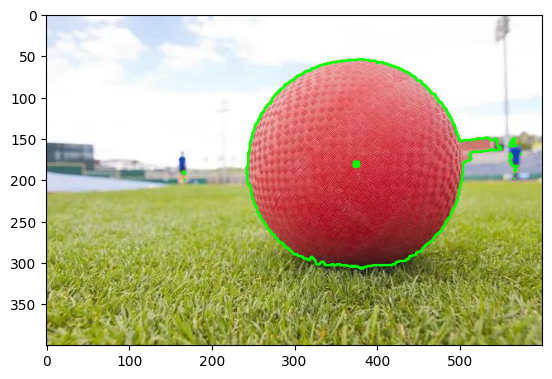

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
 color = (0, 255, 0)
 cv2.drawContours(image, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)

largest_contour = max(contours, key=cv2.contourArea)

M = cv2.moments(largest_contour)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

plt.imshow(image)
plt.show()

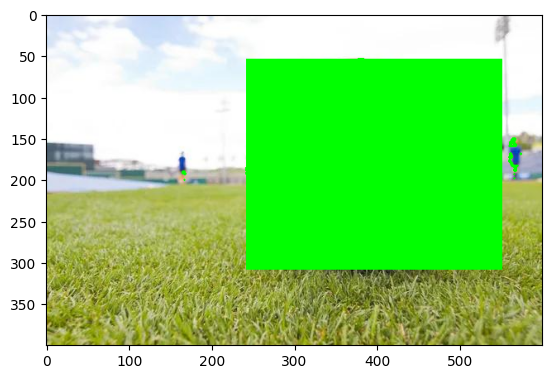

In [ ]:
x, y, w, h = cv2.boundingRect(largest_contour)

cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), -1)

plt.imshow(image)
plt.show()

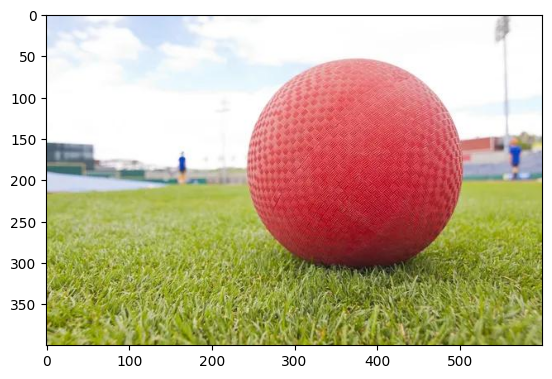

In [ ]:
image = io.imread(r'/content/drive/MyDrive/Colab Notebooks/red_ball.jpg')

io.imsave('red_ball.jpg', image)

# loading the image from the disk
image = cv2.imread('red_ball.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

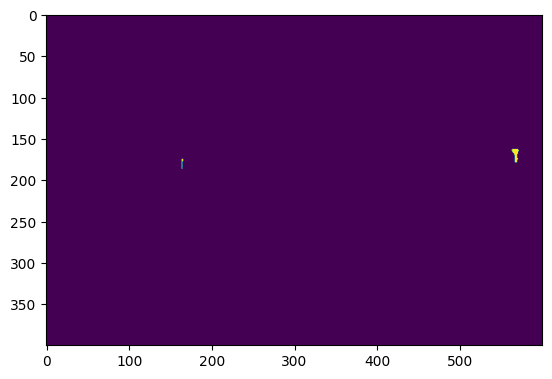

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower = np.array([100, 121, 0])
upper = np.array([133, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

#result = cv2.bitwise_and(image, image, mask=mask)

plt.imshow(mask)
plt.show()

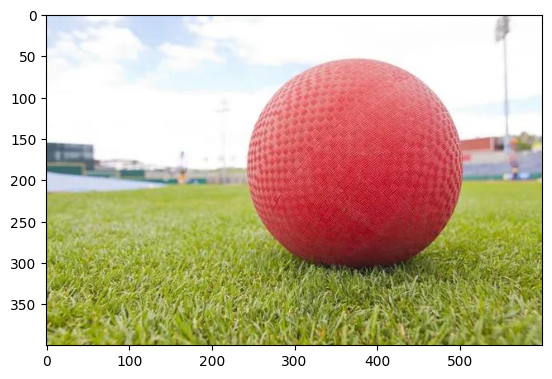

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
 color = (0, 255, 0)
 cv2.drawContours(image, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)

if contours:
  largest_contour = max(contours, key=cv2.contourArea)
  inpaint_mask = np.zeros_like(mask)
  cv2.drawContours(inpaint_mask, contours, -1, (255), thickness = 10)

  inpainted_image = cv2.inpaint(image, inpaint_mask, 5, cv2.INPAINT_NS)

  plt.imshow(inpainted_image)
  plt.show()
